In [24]:
import pycaret

In [25]:
from pycaret.regression import *

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# 한글깨짐 해결
plt.rcParams['font.family'] ="Malgun Gothic"

In [28]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [29]:
data = pd.read_csv("../autoML/automldata.csv", index_col = 0 )

In [30]:
train = data[data['date'] < '2020-09-01']
test = data[data['date'] >= '2020-09-01']

In [31]:
train = train[train['품목'] == '애호박']
test = test[test['품목'] == '애호박']
cat_f = ['주산지','요일']


setting = setup( data = train ,    target = '1_week' , categorical_features = cat_f,
               ignore_features = ['2_week','4_week','month','품목'] , normalize = True , session_id = 123)

,Description,Value
0,session_id,123
1,Target,1_week
2,Original Data,"(1450, 104)"
3,Missing Values,False
4,Numeric Features,96
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1014, 118)"


In [32]:
best = compare_models(sort = 'MAE' , exclude = ['omp','ard','par','ransac','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,269.7627,217973.7213,458.8679,0.7189,1.1582,0.1316,1.5280
lightgbm,Light Gradient Boosting Machine,288.8694,245073.8283,484.8839,0.6878,1.1537,0.1364,0.5710
gbr,Gradient Boosting Regressor,289.8237,227140.2743,470.8144,0.7035,1.1257,0.1422,1.2750
rf,Random Forest Regressor,299.7696,265278.0146,506.2124,0.6605,1.1798,0.1448,2.7950
llar,Lasso Least Angle Regression,350.6436,333937.8803,568.0788,0.5751,1.1645,0.1791,0.0220
lasso,Lasso Regression,366.7454,330857.0578,568.4171,0.5737,1.1350,0.1933,0.0300
br,Bayesian Ridge,374.6329,345124.3183,580.5304,0.5553,1.1857,0.1914,0.0320
ridge,Ridge Regression,376.6924,338635.8656,575.6985,0.5623,1.1420,0.1995,0.0150
lr,Linear Regression,384.3017,345839.8453,582.0896,0.5527,1.1580,0.2054,0.5190
en,Elastic Net,388.8372,390055.6609,616.1014,0.5008,1.2203,0.1926,0.0230


### Extra Trees Regressor

In [33]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,295.2812,253729.5138,503.7157,0.6608,1.4996,0.1354
1,301.9364,296926.7073,544.9098,0.7018,1.0343,0.1415
2,245.2546,175218.7599,418.5914,0.7253,1.0609,0.1274
3,331.4634,353027.2965,594.1610,0.6898,1.0583,0.1462
4,269.7237,194598.2820,441.1330,0.7609,1.4410,0.1264
5,281.8719,306604.5333,553.7188,0.5097,1.6636,0.1284
6,233.7616,123367.9533,351.2377,0.7973,1.0211,0.1234
7,279.1435,210398.0882,458.6917,0.7276,0.9878,0.1493
8,247.3803,168508.0072,410.4973,0.7905,1.0845,0.1207
9,211.8105,97358.0717,312.0226,0.8252,0.7305,0.1169


In [34]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,329.4969,334799.8755,578.6189,0.5524,1.5387,0.1461
1,319.0192,337658.3812,581.0838,0.6609,1.0585,0.1459
2,281.7201,210484.6783,458.7861,0.6700,1.0650,0.1473
3,372.7472,519175.8452,720.5386,0.5439,1.0830,0.1605
4,319.8375,279976.4020,529.1280,0.6559,1.4900,0.1438
5,321.8884,307763.5598,554.7644,0.5078,1.6848,0.1551
6,275.8387,192845.1854,439.1414,0.6832,1.0664,0.1429
7,312.9122,253740.6642,503.7268,0.6715,1.0778,0.1664
8,274.4537,209796.5406,458.0355,0.7392,1.1018,0.1415
9,242.9550,124809.5634,353.2840,0.7760,0.7426,0.1352


In [35]:
print(tuned_model)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


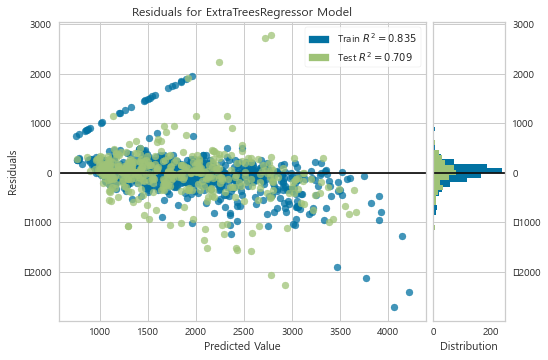

In [36]:
plot_model(tuned_model, plot = 'residuals')

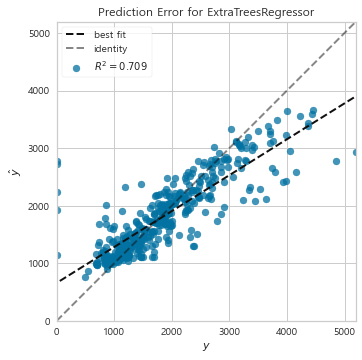

In [37]:
plot_model(tuned_model, plot = 'error')

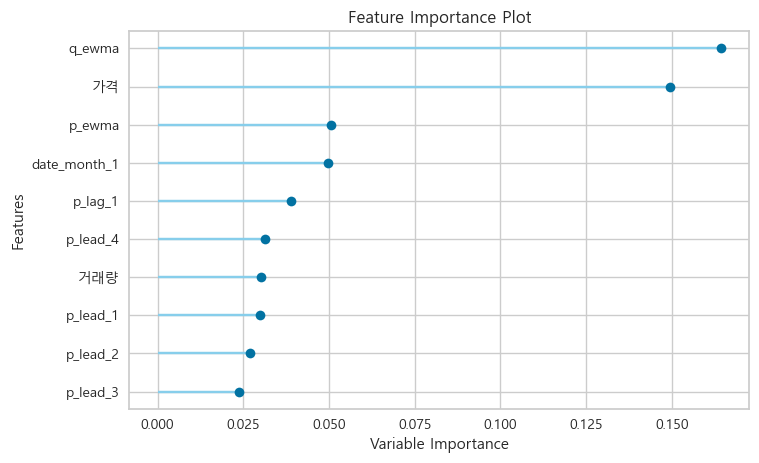

In [38]:
plot_model(tuned_model, plot = 'feature')

In [39]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,288.1476,222724.6369,471.9371,0.7092,0.8446,0.1562


,가격,거래량,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,...,date_month_6,date_month_7,date_month_8,date_month_9,date_weekday_1,date_weekday_6,date_is_month_end_0,date_is_month_start_1,1_week,Label
0,-1.186465,-0.720558,1.280983,1.721525,1.632242,1.721553,1.431206,-0.204910,-0.292332,0.228345,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1658.0,1553.476219
1,-0.033624,0.417321,-0.690237,0.631760,0.101668,-0.005947,0.247119,-0.111158,-0.056463,-0.589719,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1674.0,1711.393719
2,-0.701625,0.614307,0.663126,0.233066,0.306439,0.839883,-0.227152,-0.392416,-0.292332,2.273506,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1057.0,1191.300571
3,-0.061158,0.337685,-0.190843,0.969322,0.674332,0.847051,0.450833,-0.392416,-0.292332,0.704310,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1874.0,1673.718292
4,-0.555575,0.129927,-0.533000,-2.156443,1.170640,1.026252,1.246590,0.029471,-0.292332,-0.783080,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,906.0,1417.965912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,-0.343682,-0.200409,0.161492,0.025745,-0.710473,-0.342845,-0.790548,-1.517446,-0.292332,1.135653,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1343.0,1489.253403
432,-0.251502,0.240073,-0.727791,-0.524454,0.289085,-0.177980,0.543141,0.123224,-0.292332,-1.638329,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1985.0,1864.823522
433,-0.302979,1.265268,-0.827427,0.369951,0.809689,0.635594,0.969667,-1.095560,0.289478,-0.946693,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1742.0,1708.443652
434,1.446035,-1.613292,-1.843314,-0.283908,-1.238018,-1.091906,-1.360310,0.029471,-0.292332,0.912544,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2279.0,2576.926658


In [40]:
final_ml = finalize_model(tuned_model)
print(final_ml)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [41]:
unseen_pred = predict_model(final_ml, data = test)
unseen_pred.head()

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,...,w_lag_2m,w_lead_1,w_lead_2,w_lead_3,w_lead_4,p_lead_1,p_lead_2,p_lead_3,p_lead_4,Label
27700,2020-09-01,화요일,애호박,1763.0,349197.0,경남,1147.20,139.93,25.966667,30.400000,...,1.333333,4.066667,3.200000,0.733333,0.733333,253155.0,0.0,247705.2,261722.5,1914.902900
27701,2020-09-02,수요일,애호박,2309.0,313387.0,경남,1146.83,139.93,25.700000,28.100000,...,1.200000,1.766667,4.066667,3.200000,0.733333,224056.0,253155.0,0.0,247705.2,2068.103061
27702,2020-09-03,목요일,애호박,2414.0,270473.0,경남,1146.39,139.93,26.300000,30.666667,...,1.133333,0.800000,1.766667,4.066667,3.200000,239643.2,224056.0,253155.0,0.0,2292.747320
27703,2020-09-04,금요일,애호박,2596.0,261722.5,경남,1146.50,139.93,23.200000,30.233333,...,1.566667,0.533333,0.800000,1.766667,4.066667,199065.4,239643.2,224056.0,253155.0,2343.827418
27704,2020-09-05,토요일,애호박,2907.0,247705.2,경남,1146.22,139.93,20.066667,22.266667,...,0.900000,1.500000,0.533333,0.800000,1.766667,252270.3,199065.4,239643.2,224056.0,2449.040792


In [42]:
pred = unseen_pred[['date','1_week','Label']]
pred_0 = pred[pred['1_week'] > 0 ]

In [43]:
score = np.absolute(np.subtract(pred_0['1_week'], pred_0['Label']))/ pred_0['1_week']
score.mean()

0.30372001702451645

<AxesSubplot:xlabel='date', ylabel='1_week'>

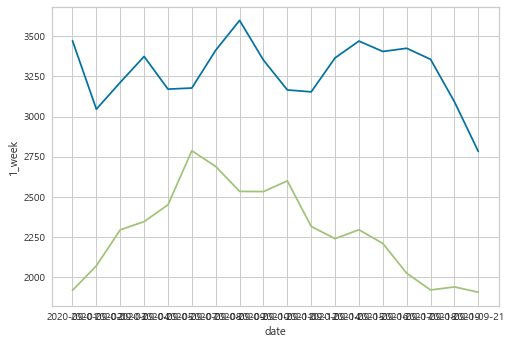

In [44]:
sns.lineplot(x= 'date', y= '1_week', data = pred_0)
sns.lineplot(x= 'date',y = 'Label', data = pred_0)